<a href="https://colab.research.google.com/github/PauSanchoBeneyto/Mercadona_Pontia/blob/main/Limpieza_datos_Carrefour_16_06_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import numpy as np
import pandas as pd
import math as mat

import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
import re

In [90]:
# cargamos los datos desde nuestro disco local, donde se encuentra el CSV con el dataset de Carrefour.

df_datos_carrefour=pd.read_csv("/content/Carrefour_categorizado.csv")

In [91]:
#Realizamos un vistazo previo a los datos que contiene el dataset scrappeado de Carrefour.
df_datos_carrefour.head()

,nombre,Precios,Precios_unit,categorias,subcategoria,precio_oferta,Categoria_principal
0,Preparado de carne picada de vacuno Carrefour ...,"6,71 €","7,46 €/kg",productos-frescos,carniceria,NaN,Carne
1,Solomillo de pavo 750 g aprox,"5,81 €","7,75 €/kg",productos-frescos,carniceria,NaN,Carne
2,Pechuga de Pollo Ecológica Carrefour Bio 500 g...,"12,39 €","24,79 €/kg",productos-frescos,carniceria,NaN,Carne
3,Hamburguesas de vacuno ecológica Carrefour Bio...,"4,50 €","18,75 €/kg",productos-frescos,carniceria,NaN,Carne
4,Jamoncito de pollo ecológico Carrefour Bio 500...,"6,79 €","13,59 €/kg",productos-frescos,carniceria,NaN,Carne


In [92]:
#Comprobamos con el metodo shape cuantos registro y columnas tiene el dataset

df_datos_carrefour.shape

(13989, 7)

In [93]:
#con el metodo .info() identificamos por cada campo cuantos cuantos datos no son nulos

df_datos_carrefour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13989 entries, 0 to 13988
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   nombre               13986 non-null  object
 1   Precios              13989 non-null  object
 2   Precios_unit         13678 non-null  object
 3   categorias           13989 non-null  object
 4   subcategoria         13989 non-null  object
 5   precio_oferta        311 non-null    object
 6   Categoria_principal  13749 non-null  object
dtypes: object(7)
memory usage: 765.1+ KB


In [94]:
#Por medio del metodo .isnull() y .sum() podemos ver la cantidad total de datos nulos tiene cada uno de los campos del dataset

df_datos_carrefour.isnull().sum()

nombre                     3
Precios                    0
Precios_unit             311
categorias                 0
subcategoria               0
precio_oferta          13678
Categoria_principal      240
dtype: int64

In [95]:
# Habiendo comprobado la cantidad de de nulos que tenemos en el dataset por cada campo, queremos ver que porcentage de peso tienen los nulos de cada campo con respecto al total de registros que tiene el dataset.

(((df_datos_carrefour.isnull().mean()) * 100).round(2))


nombre                  0.02
Precios                 0.00
Precios_unit            2.22
categorias              0.00
subcategoria            0.00
precio_oferta          97.78
Categoria_principal     1.72
dtype: float64



*   Como se puede apreciar la variable de precio_oferta contiene un 97,78% del total de registros sin ningun tipo de dato, por lo que será una variable que no se tendrá en cuenta para el analisis ya que no nos aporta nada de información.



In [96]:
# Continuamos tratando los datos y comprobando este vez los datos duplicados que podamos encontrar en nuestro dataset.

df_datos_carrefour.drop_duplicates()

,nombre,Precios,Precios_unit,categorias,subcategoria,precio_oferta,Categoria_principal
0,Preparado de carne picada de vacuno Carrefour ...,"6,71 €","7,46 €/kg",productos-frescos,carniceria,NaN,Carne
1,Solomillo de pavo 750 g aprox,"5,81 €","7,75 €/kg",productos-frescos,carniceria,NaN,Carne
2,Pechuga de Pollo Ecológica Carrefour Bio 500 g...,"12,39 €","24,79 €/kg",productos-frescos,carniceria,NaN,Carne
3,Hamburguesas de vacuno ecológica Carrefour Bio...,"4,50 €","18,75 €/kg",productos-frescos,carniceria,NaN,Carne
4,Jamoncito de pollo ecológico Carrefour Bio 500...,"6,79 €","13,59 €/kg",productos-frescos,carniceria,NaN,Carne
...,...,...,...,...,...,...,...
13984,Pienso de pollo y verduras para perro adulto P...,"37,50 €",NaN,mascotas,perros,"35,95 €",Mascotas
13985,Pomada para proteger la zona del pañal Mitosyl...,"21,07 €",NaN,parafarmacia,bebe,"17,77 €",Bebé
13986,Cepillo de dientes medio PHB 2 ud.,"6,69 €",NaN,parafarmacia,higiene-bucal,"5,95 €",Cuidado facial y corporal
13987,Cepillo dental suave PHB 2 ud.,"6,69 €",NaN,parafarmacia,higiene-bucal,"5,95 €",Cuidado facial y corporal


# TRANSFORMACION DE DATOS Y TRATAMIENTO DE VALORES NULOS


In [97]:
# Habiendo comporbado anteriormente que la variable precio_oferta nos ofrece muy poca información para nuestro analisis, procedemos a eliminar dicho campo de nuestro dataset.

df_cf_limpieza = df_datos_carrefour.drop("precio_oferta", axis=1)

df_cf_limpieza.head()

,nombre,Precios,Precios_unit,categorias,subcategoria,Categoria_principal
0,Preparado de carne picada de vacuno Carrefour ...,"6,71 €","7,46 €/kg",productos-frescos,carniceria,Carne
1,Solomillo de pavo 750 g aprox,"5,81 €","7,75 €/kg",productos-frescos,carniceria,Carne
2,Pechuga de Pollo Ecológica Carrefour Bio 500 g...,"12,39 €","24,79 €/kg",productos-frescos,carniceria,Carne
3,Hamburguesas de vacuno ecológica Carrefour Bio...,"4,50 €","18,75 €/kg",productos-frescos,carniceria,Carne
4,Jamoncito de pollo ecológico Carrefour Bio 500...,"6,79 €","13,59 €/kg",productos-frescos,carniceria,Carne


In [98]:
# Una vez eliminado el campo de precio_oferta, coninuamos con nuestra trnasformacion de datos para poder seguir trtando los valores nulos.
# Primero comprobamos el tipo de datos de que tenemos en el dataset.

df_cf_limpieza.dtypes

nombre                 object
Precios                object
Precios_unit           object
categorias             object
subcategoria           object
Categoria_principal    object
dtype: object

In [99]:
#Las columnas de categorias y subcategorias, pertencecen a las estipuladas por Carrefour para los productos de supermercado. Como nosotros necesitamos tener un database conjunto en el que unifiquemos de forma homogenea los campos
# que vamos a necesitar para el análisis, hemos asignado todos los productos de cada supermercado tanto de mercadona como los de la competencia a las mismas categorias que Mercadona, para poder tener los datos homogeneos.
# Por lo que usaremos la columna de Categoria principal, la cual hace referencia a las categorias de Mercadona pero asignadas a cada producto de Carrfour. Por ello comenzaremos limpiando la columna de Categorias princiaples de posibles datos erroneos.

df_cf_limpieza["Categoria_principal"].isnull().sum()


240

Como hemos podido comprobar antes usando el isnull, vemos que existen 240 datos NaN, dentro de este campo, por revisaremos a que puede ser debido.

In [100]:
# Para ello vamos a obtener una Serie booleana donde True significa que el valor es NaN en la columna 'Categoria_principal', de esta manera veramos que filas contienen datos vacios dicha columna.

nombre_isnull_cat_prin = df_cf_limpieza['Categoria_principal'].isnull()
filas_con_nan_en_cat_prin = df_cf_limpieza[nombre_isnull_cat_prin]

filas_con_nan_en_cat_prin

,nombre,Precios,Precios_unit,categorias,subcategoria,Categoria_principal
8924,Detergente líquido jabón de marsella y flor de...,"4,95 €","0,07 €/lavado",limpieza-y-hogar,cuidado-de-la-ropa,NaN
8925,Detergente en polvo con jabón de Marsella Carr...,"12,35 €","0,12 €/lavado",limpieza-y-hogar,cuidado-de-la-ropa,NaN
8926,Quitamanchas del día a día para la ropa 4 en 1...,"4,39 €","5,85 €/l",limpieza-y-hogar,cuidado-de-la-ropa,NaN
8927,Detergente líquido jazmín fresco y lavanda sil...,"14,45 €","0,41 €/lavado",limpieza-y-hogar,cuidado-de-la-ropa,NaN
8928,Detergente líquido coladas mixtas limpia y pro...,"17,09 €","0,33 €/lavado",limpieza-y-hogar,cuidado-de-la-ropa,NaN
...,...,...,...,...,...,...
9159,Perfume para la ropa en perlas concentrado fre...,"9,25 €","32,46 €/kg",limpieza-y-hogar,cuidado-de-la-ropa,NaN
9160,Detergente líquido limpieza profunda Skip 45 l...,"17,09 €","0,38 €/lavado",limpieza-y-hogar,cuidado-de-la-ropa,NaN
9161,Detergente líquido Optimal Clean Carrefour Exp...,"10,09 €","0,12 €/lavado",limpieza-y-hogar,cuidado-de-la-ropa,NaN
9162,Antical para lavadora en pastillas classic pro...,"3,25 €","0,08 €/lavado",limpieza-y-hogar,cuidado-de-la-ropa,NaN


Si utilizamos la columna de categorias de Carrefour podemos ver que la mayoria de productos que les falta ser asignados a una categoria de las de Mercadona son los productos de Limpieza y hogar. Por ello procederemos a asignarles a los NaN la categoria_principal de Limpieza y Hogar.

In [101]:
df_cf_limpieza['Categoria_principal'] = df_cf_limpieza['Categoria_principal'].fillna('Limpieza y hogar')

In [102]:
df_cf_limpieza.isnull().sum()

nombre                   3
Precios                  0
Precios_unit           311
categorias               0
subcategoria             0
Categoria_principal      0
dtype: int64

In [103]:
# Durante el proceso de homogeneización de las categorias, se detecto un pequeño error en la asignación de alguna de la categoria Zumos de Mercadona a algunos productos que deberian estar en la categoria 'Agua y refrescos',
# por lo que reasignaremos dichos productos a las categorias pertinentes.

palabras_filtro = ['Agua', 'fanta', 'Sprite', 'Bebida']

filtro_cat_prin = df_cf_limpieza['nombre'].str.contains('|'.join(palabras_filtro), case=False)

df_cf_limpieza.loc[filtro_cat_prin & (df_cf_limpieza['Categoria_principal'] == 'Zumos'), 'Categoria_principal'] = 'Agua y refrescos'

In [104]:
df_cf_limpieza.isnull().sum()

nombre                   3
Precios                  0
Precios_unit           311
categorias               0
subcategoria             0
Categoria_principal      0
dtype: int64

In [105]:
palabras_filtro_2 = ['Cerveza', 'Cerveza sin Alcohol', 'Vermouth', 'Bitter', 'Brandy', 'Ginebra', 'Whisky', 'Ron', 'Licor crema', 'Vodka', 'Anís', 'Licor', 'Pacharán', 'Tequila',
                     'Sidra', 'Cava', 'Tinto de verano', 'Sangria', 'Vino']

filtro_cat_prin_bodega = df_cf_limpieza['nombre'].str.contains('|'.join(palabras_filtro_2), case=False)

filtro_cat_prin_bodega = filtro_cat_prin_bodega.fillna(False)

df_cf_limpieza.loc[filtro_cat_prin_bodega, 'Categoria_principal'] = 'Bodega'

In [106]:
palabras_filtro_3 = ['Té', 'Café', 'Infusión', 'Tila', 'Rooibos', 'Cacao soluble', 'Yerba mate', 'Manzanilla', 'Poleo', 'Matcha', 'choclate liquido', 'Cola de caballo', 'Menta en bolsitas', 'poleo', 'Infudigest', 'Infulinea', 'Cappuccino', 'Hinojo']

filtro_cat_prin_cafe_infusion = df_cf_limpieza['nombre'].str.contains('|'.join(palabras_filtro_3), case=False)

filtro_cat_prin_cafe_infusion = filtro_cat_prin_cafe_infusion.fillna(False)

df_cf_limpieza.loc[filtro_cat_prin_cafe_infusion, 'Categoria_principal'] = 'Cacao, café e infusiones'

In [107]:
palabras_filtro_4 = ['Cúrcuma', 'Canela', 'Sazonador', 'Laurel', 'Albahaca', 'Comino', 'Perejil', 'Curry', 'Pimienta', 'Ajo granulado', 'Aceite', 'Azafrán', 'Salsa', 'Salsa de soja', 'Piñon Ibérico', 'Mayonesa'
,'Tomate frito', 'salsas', 'Condimento para arroz', 'Sal', 'sal marinada', 'Sazonador', 'Vinagre', 'Kétchup', 'Pimentón']

filtro_cat_prin_aceite_especias = df_cf_limpieza['nombre'].str.contains('|'.join(palabras_filtro_4), case=False)

filtro_cat_prin_aceite_especias = filtro_cat_prin_aceite_especias.fillna(False)

df_cf_limpieza.loc[filtro_cat_prin_aceite_especias,  'Categoria_principal'] = 'Aceite, especias y salsas'

In [108]:
palabras_filtro_5 = ['pasta', 'macarrones', 'Arroz', 'Legumbres', 'Garbanzos', 'Lentejas', 'Conchas con pomodoro', 'espaguetis', 'Spaghetti', 'Garbanzo', 'Tallarín',
                    'Fideo', 'Placas para lasaña', 'Noodels', 'Cuscús', 'Alubia', 'Penne', 'Tortiglioni', 'Espirales',  'Tallarines', 'soya', 'Soja texturizada', 'Fideuá',
                     'Sémola de trigo', 'Pajaritas', 'Nidos al huevo', 'Quinoa', 'Grano de avena']

filtro_cat_prin_arroz_legumbres = df_cf_limpieza['nombre'].str.contains('|'.join(palabras_filtro_5), case=False)

filtro_cat_prin_arroz_legumbres = filtro_cat_prin_arroz_legumbres.fillna(False)

df_cf_limpieza.loc[filtro_cat_prin_arroz_legumbres, 'Categoria_principal'] = 'Arroz, legumbres y pasta'


In [109]:
palabras_filtro_6 = ['Gel de manos', 'Gel de afeitar', 'Espuma de afeitar', 'Crema de afeitar', 'Bálsamo after', 'Gel', 'Locíon after', 'Maquinilla de afeitar', 'Maquinilla', 'Spray protector solar',
                     'Portector solar', 'Bruma solar', 'Aceite solar', 'Limpiador facial', 'SPRAY', 'Crema protector solar', 'desodorante', 'Toallitas de manos', 'Crema para pieles sensibles',
                    'Polvos para pieles sensibles', 'Crema pieles', 'Gotas Hidratantes', 'Roll-On', 'Toallitas Hidroalcohólicas']

filtro_cat_prin_cuidado_facial = df_cf_limpieza['nombre'].str.contains('|'.join(palabras_filtro_6), case=False)

filtro_cat_prin_cuidado_facial = filtro_cat_prin_cuidado_facial.fillna(False)

df_cf_limpieza.loc[filtro_cat_prin_cuidado_facial, 'Categoria_principal'] = 'Cuidado facial y corporal'

In [110]:
df_cf_limpieza

,nombre,Precios,Precios_unit,categorias,subcategoria,Categoria_principal
0,Preparado de carne picada de vacuno Carrefour ...,"6,71 €","7,46 €/kg",productos-frescos,carniceria,Carne
1,Solomillo de pavo 750 g aprox,"5,81 €","7,75 €/kg",productos-frescos,carniceria,Carne
2,Pechuga de Pollo Ecológica Carrefour Bio 500 g...,"12,39 €","24,79 €/kg",productos-frescos,carniceria,Carne
3,Hamburguesas de vacuno ecológica Carrefour Bio...,"4,50 €","18,75 €/kg",productos-frescos,carniceria,Carne
4,Jamoncito de pollo ecológico Carrefour Bio 500...,"6,79 €","13,59 €/kg",productos-frescos,carniceria,Carne
...,...,...,...,...,...,...
13984,Pienso de pollo y verduras para perro adulto P...,"37,50 €",NaN,mascotas,perros,Mascotas
13985,Pomada para proteger la zona del pañal Mitosyl...,"21,07 €",NaN,parafarmacia,bebe,Bebé
13986,Cepillo de dientes medio PHB 2 ud.,"6,69 €",NaN,parafarmacia,higiene-bucal,Cuidado facial y corporal
13987,Cepillo dental suave PHB 2 ud.,"6,69 €",NaN,parafarmacia,higiene-bucal,Cuidado facial y corporal


In [111]:
palabras_filtro_7 = ['Parches térmicos', 'Gafa presbicia', 'Loción talquistina', 'Parches tratamientos', 'Colirio', 'lentillas', 'cuidado de fosas nasales', 'lentes de contacto', 'Apositos ampollas',
                     'Mascarillas quirurjicas', 'tiras infantiles', 'Alcohol etílico', 'Tiras adhesivas', 'Apósitos gasa', 'Esparadrapo', 'Tiras resistentes', 'Tiras universales', 'Venda', 'Gasas', 'GASAS',
                     'Povidona iodada', 'Pastillas de regaliz', 'Clorhexidina', 'Apósitos', 'Parches', 'Emulsión calmante', 'Stick de arnica', 'Tapones para los oídos', 'Própolis con miel', 'Termómetro'
                     'Gotas Hidratantes', 'Agua de mar Sinusitis', 'Roll on', 'Roll-On', 'Repelente anti mosquitos', 'Bálsamo', 'Termómetro', 'Gotas Hidratantes para Ojos', 'Apósito',
                     'Solucion Lente', 'Crema analgésica', 'Tapones de Silicona', 'Tapones de Oído', 'Protectores Auditivos', 'Suero Fisiológico', 'Tirita', 'Pulsera Antimosquitos', 'Alcohol de Romero',
                     'Tiras de dedos', 'tiras de pieles', 'Repelente de insectos', 'Tiras Transparentes', 'Alcohol Carrefour 500 ML.', 'Alcohol 96º Orb', 'Mascarilla Quirúrjica', 'Agua Oxigenada',
                     'Mascarillas Quirúrgicas', 'Aposito postpicadura', 'Tapones oído', 'Tiras dedos', 'Tiras pieles', 'Mascarilla Quirúrgica']

filtro_cat_prin_parafarmacia = df_cf_limpieza['nombre'].str.contains('|'.join(palabras_filtro_7), case=False)

filtro_cat_prin_parafarmacia = filtro_cat_prin_parafarmacia.fillna(False)

df_cf_limpieza.loc[filtro_cat_prin_parafarmacia, 'Categoria_principal'] = 'Fitoterapia y parafarmacia'

In [112]:
df_cf_limpieza.loc[df_cf_limpieza['Categoria_principal'] == 'bazar', 'Categoria_principal'] = 'Limpieza y hogar'


In [113]:
df_cf_limpieza.loc[df_cf_limpieza['Categoria_principal'] == 'calzado', 'Categoria_principal'] = 'Limpieza y hogar'

In [114]:
df_cf_limpieza.loc[(df_cf_limpieza['Categoria_principal'] == 'Huevos') | (df_cf_limpieza['Categoria_principal'] == 'leche y mantequilla'), 'Categoria_principal'] = 'Huevos, leche y mantequilla'


In [115]:
#Realizamos una comprobación para ver si el codigo llevado a cabo ha funcionado.

df_cf_limpieza.loc[df_cf_limpieza['nombre'] == 'Agua mineral Lanjarón tapón deportivo 75 cl.']


,nombre,Precios,Precios_unit,categorias,subcategoria,Categoria_principal
8143,Agua mineral Lanjarón tapón deportivo 75 cl.,"0,99 €","1,32 €/l",bebidas,aguas-y-zumos,Agua y refrescos


In [116]:
df_cf_limpieza.loc[df_cf_limpieza['nombre'] == 'Perejil Carrefour 60 g.']

,nombre,Precios,Precios_unit,categorias,subcategoria,Categoria_principal
2939,Perejil Carrefour 60 g.,"3,25 €","54,17 €/kg",la-despensa,alimentacion,"Aceite, especias y salsas"


In [117]:
df_cf_limpieza.loc[df_cf_limpieza['nombre'] == 'Mosto Carrefour blanco botella 1 l.']

,nombre,Precios,Precios_unit,categorias,subcategoria,Categoria_principal
8299,Mosto Carrefour blanco botella 1 l.,"2,29 €","2,29 €/l",bebidas,aguas-y-zumos,Zumos


In [118]:
df_cf_limpieza.loc[df_cf_limpieza['nombre'] == 'Té sabor melocotón y hibisco Fuze Tea 400 ml.']

,nombre,Precios,Precios_unit,categorias,subcategoria,Categoria_principal
8231,Té sabor melocotón y hibisco Fuze Tea 400 ml.,"1,66 €","4,15 €/l",bebidas,aguas-y-zumos,"Cacao, café e infusiones"


In [119]:
# Habiendo corregido y limpiado los posibles errores del campo 'Categoria_principal', nos disponemos a comprobar cual es el estado del campo 'nombre, otra de nuestras variables catgórica.
# Como hemos visto por medio del metodo isnull, esta campo contiene 3 datos nulos. Al ser un nombre de producto que para nuestro análisis, no tiene un peso importante,
# y tampoco es un dato que podamos avergiguar cual es, con alguno de los campos de información que disponemos, procedemos asignarle el nombre 'Desconocido' a esos tres productos.

df_cf_limpieza['nombre'] = df_cf_limpieza['nombre'].fillna('Desconocido')

In [120]:
df_cf_limpieza.isnull().sum()

nombre                   0
Precios                  0
Precios_unit           311
categorias               0
subcategoria             0
Categoria_principal      0
dtype: int64

In [121]:
df_cf_limpieza.loc[df_cf_limpieza['nombre'] == 'Desconocido']

,nombre,Precios,Precios_unit,categorias,subcategoria,Categoria_principal
7273,Desconocido,"2,09 €",55 €/kg,la-despensa,aperitivos,Aperitivos
12745,Desconocido,"37,50 €","2,50 €/kg",mascotas,perros,Mascotas
12778,Desconocido,"12,99 €","1,30 €/kg",mascotas,perros,Mascotas


In [122]:
df_cf_limpieza['categorias'] = df_cf_limpieza['categorias'].str.replace('-', ' ')

In [123]:
df_cf_limpieza['subcategoria'] = df_cf_limpieza['subcategoria'].str.replace('-', ' ')

In [124]:
df_cf_limpieza.head()

,nombre,Precios,Precios_unit,categorias,subcategoria,Categoria_principal
0,Preparado de carne picada de vacuno Carrefour ...,"6,71 €","7,46 €/kg",productos frescos,carniceria,Carne
1,Solomillo de pavo 750 g aprox,"5,81 €","7,75 €/kg",productos frescos,carniceria,Carne
2,Pechuga de Pollo Ecológica Carrefour Bio 500 g...,"12,39 €","24,79 €/kg",productos frescos,carniceria,Carne
3,Hamburguesas de vacuno ecológica Carrefour Bio...,"4,50 €","18,75 €/kg",productos frescos,carniceria,Carne
4,Jamoncito de pollo ecológico Carrefour Bio 500...,"6,79 €","13,59 €/kg",productos frescos,carniceria,Carne


In [125]:
# Una vez limpiados los campos de variables de tipo categórico nos centraremos en los campos de precios, los cuales son variables de tipo float.
# Para ello primero revisamos que tipos de variables muestra nuestro dataset de Carrefour.

df_cf_limpieza.dtypes

nombre                 object
Precios                object
Precios_unit           object
categorias             object
subcategoria           object
Categoria_principal    object
dtype: object

Como podemos ver todas las variables del dataset son de tipo categoricas, es decir de formato string, por lo que necesitamos cambiar el tipo de variable de los precios a float.

In [126]:
# Abordaaremos primero la columna de precios.
# Para ello necesitamos eliminar ciertos caracteres extraños como el simbolo del € y el KG.

df_cf_limpieza["Precios"] = df_cf_limpieza["Precios"].apply(lambda x: x.strip('€'))

df_cf_limpieza


,nombre,Precios,Precios_unit,categorias,subcategoria,Categoria_principal
0,Preparado de carne picada de vacuno Carrefour ...,"6,71","7,46 €/kg",productos frescos,carniceria,Carne
1,Solomillo de pavo 750 g aprox,"5,81","7,75 €/kg",productos frescos,carniceria,Carne
2,Pechuga de Pollo Ecológica Carrefour Bio 500 g...,"12,39","24,79 €/kg",productos frescos,carniceria,Carne
3,Hamburguesas de vacuno ecológica Carrefour Bio...,"4,50","18,75 €/kg",productos frescos,carniceria,Carne
4,Jamoncito de pollo ecológico Carrefour Bio 500...,"6,79","13,59 €/kg",productos frescos,carniceria,Carne
...,...,...,...,...,...,...
13984,Pienso de pollo y verduras para perro adulto P...,"37,50",NaN,mascotas,perros,Mascotas
13985,Pomada para proteger la zona del pañal Mitosyl...,"21,07",NaN,parafarmacia,bebe,Bebé
13986,Cepillo de dientes medio PHB 2 ud.,"6,69",NaN,parafarmacia,higiene bucal,Cuidado facial y corporal
13987,Cepillo dental suave PHB 2 ud.,"6,69",NaN,parafarmacia,higiene bucal,Cuidado facial y corporal


Como podemos ver, hemos conseguido quitar de esta forma los caracteres extraños que impiden poder transformar la variable Precio en una variable numérica.

In [127]:
# Como en Phyton el separador de decimales debe ser "." y no la "," debemos modificar esto antes para poder cambiar el tipo de variable.

df_cf_limpieza["Precios"] = df_cf_limpieza["Precios"].str.replace(',', '.').str.strip().astype(float)
df_cf_limpieza

,nombre,Precios,Precios_unit,categorias,subcategoria,Categoria_principal
0,Preparado de carne picada de vacuno Carrefour ...,6.71,"7,46 €/kg",productos frescos,carniceria,Carne
1,Solomillo de pavo 750 g aprox,5.81,"7,75 €/kg",productos frescos,carniceria,Carne
2,Pechuga de Pollo Ecológica Carrefour Bio 500 g...,12.39,"24,79 €/kg",productos frescos,carniceria,Carne
3,Hamburguesas de vacuno ecológica Carrefour Bio...,4.50,"18,75 €/kg",productos frescos,carniceria,Carne
4,Jamoncito de pollo ecológico Carrefour Bio 500...,6.79,"13,59 €/kg",productos frescos,carniceria,Carne
...,...,...,...,...,...,...
13984,Pienso de pollo y verduras para perro adulto P...,37.50,NaN,mascotas,perros,Mascotas
13985,Pomada para proteger la zona del pañal Mitosyl...,21.07,NaN,parafarmacia,bebe,Bebé
13986,Cepillo de dientes medio PHB 2 ud.,6.69,NaN,parafarmacia,higiene bucal,Cuidado facial y corporal
13987,Cepillo dental suave PHB 2 ud.,6.69,NaN,parafarmacia,higiene bucal,Cuidado facial y corporal


In [128]:
# Antes de quitarle los caracteres extraños como los simbolos '€' y las unidades de medida para poder transformar la variable Precios_unit a float para poder realizar el análisis,
# los extraemos y los recolocamos en un nuevo campo que nos servirá para conformar el nuevo dataset general con todos los datos de los supermercados.

df_cf_limpieza['Unidad de referencia'] = df_cf_limpieza['Precios_unit'].str.extract(r'(\€/\w+)')
df_cf_limpieza

,nombre,Precios,Precios_unit,categorias,subcategoria,Categoria_principal,Unidad de referencia
0,Preparado de carne picada de vacuno Carrefour ...,6.71,"7,46 €/kg",productos frescos,carniceria,Carne,€/kg
1,Solomillo de pavo 750 g aprox,5.81,"7,75 €/kg",productos frescos,carniceria,Carne,€/kg
2,Pechuga de Pollo Ecológica Carrefour Bio 500 g...,12.39,"24,79 €/kg",productos frescos,carniceria,Carne,€/kg
3,Hamburguesas de vacuno ecológica Carrefour Bio...,4.50,"18,75 €/kg",productos frescos,carniceria,Carne,€/kg
4,Jamoncito de pollo ecológico Carrefour Bio 500...,6.79,"13,59 €/kg",productos frescos,carniceria,Carne,€/kg
...,...,...,...,...,...,...,...
13984,Pienso de pollo y verduras para perro adulto P...,37.50,NaN,mascotas,perros,Mascotas,NaN
13985,Pomada para proteger la zona del pañal Mitosyl...,21.07,NaN,parafarmacia,bebe,Bebé,NaN
13986,Cepillo de dientes medio PHB 2 ud.,6.69,NaN,parafarmacia,higiene bucal,Cuidado facial y corporal,NaN
13987,Cepillo dental suave PHB 2 ud.,6.69,NaN,parafarmacia,higiene bucal,Cuidado facial y corporal,NaN


In [129]:
df_cf_limpieza['Unidad de referencia'] = df_cf_limpieza['Unidad de referencia'].fillna('No especificado')

In [130]:
df_cf_limpieza.loc[df_cf_limpieza['Unidad de referencia'] == 'No especificado']

,nombre,Precios,Precios_unit,categorias,subcategoria,Categoria_principal,Unidad de referencia
13678,Preparado de carne picada de vacuno Calidad y ...,4.59,NaN,productos frescos,carniceria,Carne,No especificado
13679,Pechuga de pollo fileteada 1 kg aprox,7.29,NaN,productos frescos,carniceria,Carne,No especificado
13680,Alas de pollo adobadas partidas Carrefour 550 ...,2.35,NaN,productos frescos,carniceria,Carne,No especificado
13681,"Trozo de lomo de cerdo Carrefour 1,2 kg aprox",6.35,NaN,productos frescos,carniceria,Carne,No especificado
13682,Entrecot de añojo Calidad y Origen Carrefour 5...,10.62,NaN,productos frescos,carniceria,Carne,No especificado
...,...,...,...,...,...,...,...
13984,Pienso de pollo y verduras para perro adulto P...,37.50,NaN,mascotas,perros,Mascotas,No especificado
13985,Pomada para proteger la zona del pañal Mitosyl...,21.07,NaN,parafarmacia,bebe,Bebé,No especificado
13986,Cepillo de dientes medio PHB 2 ud.,6.69,NaN,parafarmacia,higiene bucal,Cuidado facial y corporal,No especificado
13987,Cepillo dental suave PHB 2 ud.,6.69,NaN,parafarmacia,higiene bucal,Cuidado facial y corporal,No especificado


In [131]:
df_cf_limpieza.loc[df_cf_limpieza['Unidad de referencia'] == '€/kg', 'Unidad de referencia'] = 'KILO'

In [132]:
df_cf_limpieza.loc[df_cf_limpieza['Unidad de referencia'] == '€/m', 'Unidad de referencia'] = 'METRO'

In [133]:
df_cf_limpieza.loc[df_cf_limpieza['Unidad de referencia'] == '€/ud', 'Unidad de referencia'] = 'UNIDAD'

In [134]:
df_cf_limpieza.loc[df_cf_limpieza['Unidad de referencia'] == '€/l', 'Unidad de referencia'] = 'LITRO'

In [135]:
df_cf_limpieza.loc[df_cf_limpieza['Unidad de referencia'] == '€/lavado', 'Unidad de referencia'] = 'LAVADO'

In [136]:
df_cf_limpieza.loc[df_cf_limpieza['Unidad de referencia'] == '€/docena', 'Unidad de referencia'] = 'DOCENA'

In [137]:
df_cf_limpieza.loc[df_cf_limpieza['Unidad de referencia'] == '€/100ml', 'Unidad de referencia'] = '100 ML'

In [138]:
df_cf_limpieza.loc[df_cf_limpieza['Unidad de referencia'] == '€/100g', 'Unidad de referencia'] = '100 GR'

In [139]:
df_cf_limpieza.loc[df_cf_limpieza['Unidad de referencia'] == '€/g', 'Unidad de referencia'] = 'GRAMO'

In [140]:
df_cf_limpieza

,nombre,Precios,Precios_unit,categorias,subcategoria,Categoria_principal,Unidad de referencia
0,Preparado de carne picada de vacuno Carrefour ...,6.71,"7,46 €/kg",productos frescos,carniceria,Carne,KILO
1,Solomillo de pavo 750 g aprox,5.81,"7,75 €/kg",productos frescos,carniceria,Carne,KILO
2,Pechuga de Pollo Ecológica Carrefour Bio 500 g...,12.39,"24,79 €/kg",productos frescos,carniceria,Carne,KILO
3,Hamburguesas de vacuno ecológica Carrefour Bio...,4.50,"18,75 €/kg",productos frescos,carniceria,Carne,KILO
4,Jamoncito de pollo ecológico Carrefour Bio 500...,6.79,"13,59 €/kg",productos frescos,carniceria,Carne,KILO
...,...,...,...,...,...,...,...
13984,Pienso de pollo y verduras para perro adulto P...,37.50,NaN,mascotas,perros,Mascotas,No especificado
13985,Pomada para proteger la zona del pañal Mitosyl...,21.07,NaN,parafarmacia,bebe,Bebé,No especificado
13986,Cepillo de dientes medio PHB 2 ud.,6.69,NaN,parafarmacia,higiene bucal,Cuidado facial y corporal,No especificado
13987,Cepillo dental suave PHB 2 ud.,6.69,NaN,parafarmacia,higiene bucal,Cuidado facial y corporal,No especificado


In [141]:
df_cf_limpieza['Precios_unit'] = df_cf_limpieza['Precios_unit'].str.replace('[^0-9.,]', '', regex=True)

In [142]:
df_cf_limpieza

,nombre,Precios,Precios_unit,categorias,subcategoria,Categoria_principal,Unidad de referencia
0,Preparado de carne picada de vacuno Carrefour ...,6.71,"7,46",productos frescos,carniceria,Carne,KILO
1,Solomillo de pavo 750 g aprox,5.81,"7,75",productos frescos,carniceria,Carne,KILO
2,Pechuga de Pollo Ecológica Carrefour Bio 500 g...,12.39,"24,79",productos frescos,carniceria,Carne,KILO
3,Hamburguesas de vacuno ecológica Carrefour Bio...,4.50,"18,75",productos frescos,carniceria,Carne,KILO
4,Jamoncito de pollo ecológico Carrefour Bio 500...,6.79,"13,59",productos frescos,carniceria,Carne,KILO
...,...,...,...,...,...,...,...
13984,Pienso de pollo y verduras para perro adulto P...,37.50,NaN,mascotas,perros,Mascotas,No especificado
13985,Pomada para proteger la zona del pañal Mitosyl...,21.07,NaN,parafarmacia,bebe,Bebé,No especificado
13986,Cepillo de dientes medio PHB 2 ud.,6.69,NaN,parafarmacia,higiene bucal,Cuidado facial y corporal,No especificado
13987,Cepillo dental suave PHB 2 ud.,6.69,NaN,parafarmacia,higiene bucal,Cuidado facial y corporal,No especificado


In [143]:
def convertir_a_numerico(cadena):
  if pd.isna(cadena):
    return 0
  cadena = cadena.replace(".", "")
  cadena = cadena.replace(",", ".")
  return float(cadena)

In [144]:
df_cf_limpieza['Precios_unit'] = df_cf_limpieza['Precios_unit'].apply(convertir_a_numerico)

In [145]:
df_cf_limpieza

,nombre,Precios,Precios_unit,categorias,subcategoria,Categoria_principal,Unidad de referencia
0,Preparado de carne picada de vacuno Carrefour ...,6.71,7.46,productos frescos,carniceria,Carne,KILO
1,Solomillo de pavo 750 g aprox,5.81,7.75,productos frescos,carniceria,Carne,KILO
2,Pechuga de Pollo Ecológica Carrefour Bio 500 g...,12.39,24.79,productos frescos,carniceria,Carne,KILO
3,Hamburguesas de vacuno ecológica Carrefour Bio...,4.50,18.75,productos frescos,carniceria,Carne,KILO
4,Jamoncito de pollo ecológico Carrefour Bio 500...,6.79,13.59,productos frescos,carniceria,Carne,KILO
...,...,...,...,...,...,...,...
13984,Pienso de pollo y verduras para perro adulto P...,37.50,0.00,mascotas,perros,Mascotas,No especificado
13985,Pomada para proteger la zona del pañal Mitosyl...,21.07,0.00,parafarmacia,bebe,Bebé,No especificado
13986,Cepillo de dientes medio PHB 2 ud.,6.69,0.00,parafarmacia,higiene bucal,Cuidado facial y corporal,No especificado
13987,Cepillo dental suave PHB 2 ud.,6.69,0.00,parafarmacia,higiene bucal,Cuidado facial y corporal,No especificado


In [146]:
# Observamos que hay precios demasiado altos, por lo que realizamos un filtro para poder comprobar cuantos productos hay con precios erroneos.

filtro_miles = df_cf_limpieza[df_cf_limpieza["Precios_unit"] > 1000]

In [147]:
filtro_miles

,nombre,Precios,Precios_unit,categorias,subcategoria,Categoria_principal,Unidad de referencia
782,Tarta Brownie Cake 550 g,10.90,10900.00,productos frescos,panaderia tradicional,Panadería y pastelería,KILO
2253,Azafrán de la Mancha en hebras De Nuestra Tier...,14.19,1419100.00,la despensa,alimentacion,"Aceite, especias y salsas",100 GR
10137,Pegamento Loctite con Pince Súper Glue-3 5 gr,8.49,1698.00,limpieza y hogar,bazar,Limpieza y hogar,KILO
10146,Pegamento Súper-Glue Loctite 5 gr,8.49,1698.00,limpieza y hogar,bazar,Limpieza y hogar,KILO
10169,Adhesico Instantaneo UltraUnick 3gr,5.39,1796.67,limpieza y hogar,bazar,Limpieza y hogar,KILO
10480,Jabón de manos con mandarina y camomila para t...,2.99,1100.00,perfumeria e higiene,bano e higiene corporal,Cuidado facial y corporal,100 ML
11138,Sérum anti edad con 12% de vitamina C pura + v...,23.70,79100.00,perfumeria e higiene,cuidado y proteccion corporal,"Aceite, especias y salsas",100 ML
11169,Crema de día FP50 Cellular Luminous 630 Antima...,24.00,60100.00,perfumeria e higiene,cuidado y proteccion corporal,Cuidado facial y corporal,100 ML
11201,Sérum Cellular Luminous 630 Antimanchas Nivea ...,24.30,81100.00,perfumeria e higiene,cuidado y proteccion corporal,Cuidado facial y corporal,100 ML
11216,Crema de noche antiedad celular con ácido hial...,20.50,41100.00,perfumeria e higiene,cuidado y proteccion corporal,Cuidado facial y corporal,100 ML


In [148]:
# Comprobandolo con la página web, observamos que los precios_unit que estan mal son algunos que acaban en 100.00, por lo que realizamos un filtro para identificarlos y posteriormente los dividmos por mil para que la coma de los decimales,
# seé situada correctamente.
# Filtrar el DataFrame
filtro = (df_cf_limpieza["Unidad de referencia"] != '€/kg') & (df_cf_limpieza["Precios_unit"] > 1000)

# Aplicamos el filtro y dividimos los precios por 1000
df_cf_limpieza.loc[filtro, "Precios_unit"] = df_cf_limpieza.loc[filtro, "Precios_unit"] / 1000


In [149]:
df_cf_limpieza

,nombre,Precios,Precios_unit,categorias,subcategoria,Categoria_principal,Unidad de referencia
0,Preparado de carne picada de vacuno Carrefour ...,6.71,7.46,productos frescos,carniceria,Carne,KILO
1,Solomillo de pavo 750 g aprox,5.81,7.75,productos frescos,carniceria,Carne,KILO
2,Pechuga de Pollo Ecológica Carrefour Bio 500 g...,12.39,24.79,productos frescos,carniceria,Carne,KILO
3,Hamburguesas de vacuno ecológica Carrefour Bio...,4.50,18.75,productos frescos,carniceria,Carne,KILO
4,Jamoncito de pollo ecológico Carrefour Bio 500...,6.79,13.59,productos frescos,carniceria,Carne,KILO
...,...,...,...,...,...,...,...
13984,Pienso de pollo y verduras para perro adulto P...,37.50,0.00,mascotas,perros,Mascotas,No especificado
13985,Pomada para proteger la zona del pañal Mitosyl...,21.07,0.00,parafarmacia,bebe,Bebé,No especificado
13986,Cepillo de dientes medio PHB 2 ud.,6.69,0.00,parafarmacia,higiene bucal,Cuidado facial y corporal,No especificado
13987,Cepillo dental suave PHB 2 ud.,6.69,0.00,parafarmacia,higiene bucal,Cuidado facial y corporal,No especificado


In [150]:
df_cf_limpieza.dtypes

nombre                   object
Precios                 float64
Precios_unit            float64
categorias               object
subcategoria             object
Categoria_principal      object
Unidad de referencia     object
dtype: object

In [151]:
Filtro_mayores_mil = df_cf_limpieza.loc[df_cf_limpieza["Precios_unit"]>1000]

In [152]:
Filtro_mayores_mil

,nombre,Precios,Precios_unit,categorias,subcategoria,Categoria_principal,Unidad de referencia
2253,Azafrán de la Mancha en hebras De Nuestra Tier...,14.19,1419.1,la despensa,alimentacion,"Aceite, especias y salsas",100 GR


In [153]:
filtro_precios_mil = df_cf_limpieza.loc[df_cf_limpieza["Precios_unit"] > 1000]

In [154]:
filtro_precios_mil

,nombre,Precios,Precios_unit,categorias,subcategoria,Categoria_principal,Unidad de referencia
2253,Azafrán de la Mancha en hebras De Nuestra Tier...,14.19,1419.1,la despensa,alimentacion,"Aceite, especias y salsas",100 GR


In [155]:
df_cf_limpieza

,nombre,Precios,Precios_unit,categorias,subcategoria,Categoria_principal,Unidad de referencia
0,Preparado de carne picada de vacuno Carrefour ...,6.71,7.46,productos frescos,carniceria,Carne,KILO
1,Solomillo de pavo 750 g aprox,5.81,7.75,productos frescos,carniceria,Carne,KILO
2,Pechuga de Pollo Ecológica Carrefour Bio 500 g...,12.39,24.79,productos frescos,carniceria,Carne,KILO
3,Hamburguesas de vacuno ecológica Carrefour Bio...,4.50,18.75,productos frescos,carniceria,Carne,KILO
4,Jamoncito de pollo ecológico Carrefour Bio 500...,6.79,13.59,productos frescos,carniceria,Carne,KILO
...,...,...,...,...,...,...,...
13984,Pienso de pollo y verduras para perro adulto P...,37.50,0.00,mascotas,perros,Mascotas,No especificado
13985,Pomada para proteger la zona del pañal Mitosyl...,21.07,0.00,parafarmacia,bebe,Bebé,No especificado
13986,Cepillo de dientes medio PHB 2 ud.,6.69,0.00,parafarmacia,higiene bucal,Cuidado facial y corporal,No especificado
13987,Cepillo dental suave PHB 2 ud.,6.69,0.00,parafarmacia,higiene bucal,Cuidado facial y corporal,No especificado


In [156]:
filtro_indice = df_cf_limpieza.loc[1078]

In [157]:
filtro_indice

nombre                  Paté a las finas hierbas Classic Carrefour sin...
Precios                                                              1.11
Precios_unit                                                         6.94
categorias                                              productos frescos
subcategoria                                                  charcuteria
Categoria_principal                              Cacao, café e infusiones
Unidad de referencia                                                 KILO
Name: 1078, dtype: object

In [158]:
# Teniendo los campos del dataset formateados con los tipos de variables correctos, podemos realizar un analisis estadistico preliminar de las variables numércias
# Usando el método "describe", podemos ver los datos estadísticos descriptivos de las variables transformadas en float.

df_cf_limpieza["Precios"].describe().round(2)

count    13989.00
mean         5.85
std         10.07
min          0.21
25%          2.15
50%          3.45
75%          5.99
max        439.00
Name: Precios, dtype: float64

De esta manera comprobamos que no existe ningun NaN en la columna de "Precios". La media de precios de los articulos de Carrefour ronda los 5,85€, mientras que gracias a los cuartiles podemos comprobar que el 75% del total de los precios de los articulos de Carrefour es de 5.99€ o inferior, por lo que nos hace pensar que si el valor MAX=439€ pude haber un error o existe algún outlier en este campo.

In [159]:
#Para poder comprobar si la desviación estandar es muy grande o no. Calculamos el ratio para saber como se dispersa la distribución
df_cf_limpieza["Precios"].std()/df_cf_limpieza["Precios"].mean()

1.721827588598702

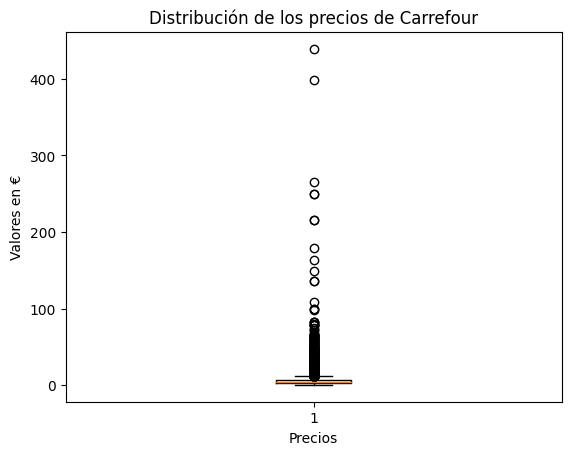

In [160]:
# Usamos un boxplot para poder ver la dispersión de la variable Precios.
plt.boxplot(df_cf_limpieza["Precios"])
plt.xlabel("Precios")
plt.ylabel("Valores en €")
plt.title("Distribución de los precios de Carrefour")
plt.show()


Como podemos ver existen muchos valores atípicos que no podemos pasar por alto.

In [161]:
print("Diferencias percentiles de la distribución de los precios")
df_cf_limpieza["Precios"].quantile([0.1, 0.25, 0.50, 0.75, 0.9, 0.95, 0.99, 0.999, 0.9999])

Diferencias percentiles de la distribución de los precios


0.1000      1.4300
0.2500      2.1500
0.5000      3.4500
0.7500      5.9900
0.9000     12.1900
0.9500     17.8900
0.9900     36.7120
0.9990     99.0000
0.9999    345.5608
Name: Precios, dtype: float64

<Axes: >

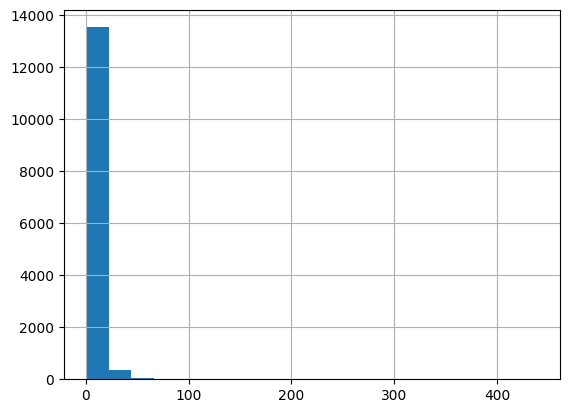

In [162]:
df_cf_limpieza["Precios"].hist(bins=20)

Para corroborar la informacion extraida del boxplot, usando un histograma podemos confirmar que la distribución de la variable Precios, es asimétrica

In [163]:
# Si importamos scipy, podemos calcular una media más robusta.
from scipy.stats import trim_mean

print("Media truncada")
round(trim_mean(df_cf_limpieza["Precios"],0.05),2)

Media truncada


4.61

In [164]:
IQR = (df_cf_limpieza["Precios"].quantile(0.75) - df_cf_limpieza["Precios"].quantile(0.25)).round(2)

print(IQR)

inferior = (df_cf_limpieza["Precios"].quantile(0.75) - 3*IQR).round(2)
superior = (df_cf_limpieza["Precios"].quantile(0.75) + 3*IQR).round(2)

print([inferior, superior])


3.84
[-5.53, 17.51]


El rango intercuartil es de 3.84, mientras que el limite para los valores atípicos, es de -5.53 y 17.51. Esto significa que cualquier valor de precio por debajo de -5.53 o por encima de 17.51 se consideraría un valor atípico.

Sin embargo, en nuestro caso, dado que estamos trabajando los precios de productos de supermercado, no tiene sentido tener un precio negativo. Por lo tanto, consideraremos solo el límite superior para determinar los valores atípicos. Para ello , procedermos a dividar nuestro dataset en dos, filtrandolo por los productos con precios menores a 17.51€ (precios_bajos) y los productos con precios superiores a 17.51€ (precios_altos).

De esta manera como la mayoria de los productos de carrefour estan incluidos en nuestro nuevo dataset de precio_bajos y el resto de supermercados se hallan en la mism situación, se ha tomado la decisión de tomar tan solo este dataset para incluirlo en nuestro analisis general de todos los supermercados, proporcionandonos de esta manera un mejor analisis y una mayor estracción de información y conclusiones de nuestras hipótesis.

In [165]:
# Procedemos de este modo a dividir los datos en dos dataframes de la siguiente manera:

df__cf_precios_altos = df_cf_limpieza[df_cf_limpieza["Precios"] > 17.51]
df_cf_precios_bajos = df_cf_limpieza[df_cf_limpieza["Precios"] <= 17.51]


In [166]:
df_cf_precios_bajos = df_cf_precios_bajos.sort_values("Precios", ascending=False)
df_cf_precios_bajos

,nombre,Precios,Precios_unit,categorias,subcategoria,Categoria_principal,Unidad de referencia
351,Merluza en filete 1 kg aprox,17.50,17.50,productos frescos,pescaderia,Marisco y pescado,KILO
13229,Parches térmicos terapéuticos para dolor de cu...,17.49,2.91,parafarmacia,botiquin,Fitoterapia y parafarmacia,UNIDAD
8890,Crema de whisky Baileys salted caramel 70 cl.,17.49,24.99,bebidas,licores y cremas,"Aceite, especias y salsas",LITRO
11946,Maquinilla ProGlide Power Gillette 1 ud.,17.49,17.49,perfumeria e higiene,depilacion y afeitado,Cuidado facial y corporal,UNIDAD
10132,Rotuladores 20 ud Punta Fina STABILO Point 88 ...,17.49,17.49,limpieza y hogar,papeleria,papeleria,UNIDAD
...,...,...,...,...,...,...,...
8420,"Agua mineral Font Natura 1,5 l.",0.25,0.17,bebidas,aguas y zumos,Agua y refrescos,LITRO
8294,Agua mineral Carrefour Kids tapón deportivo 33...,0.24,0.73,bebidas,aguas y zumos,Agua y refrescos,LITRO
8422,"Agua mineral Font Natura 0,5 l.",0.22,0.44,bebidas,aguas y zumos,Agua y refrescos,LITRO
8289,Agua mineral Fuente Primavera 50 cl.,0.22,0.44,bebidas,aguas y zumos,Agua y refrescos,LITRO


In [167]:
df_cf_precios_bajos.shape

(13257, 7)

In [168]:
df_cf_precios_bajos.describe().round(2)

,Precios,Precios_unit
count,13257.00,13257.00
mean,4.38,13.02
std,3.40,24.88
min,0.21,0.00
25%,2.06,2.60
50%,3.25,7.39
75%,5.39,15.18
max,17.50,1419.10


<Axes: >

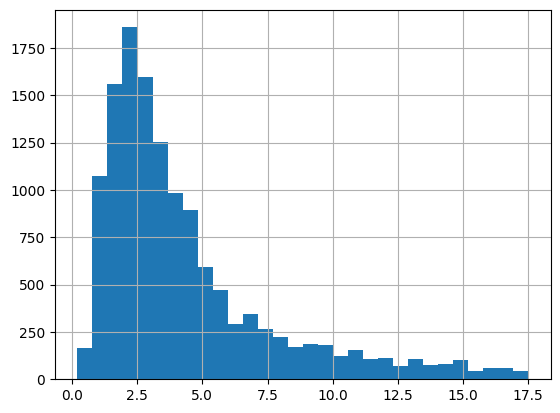

In [169]:
df_cf_precios_bajos["Precios"].hist(bins=30)

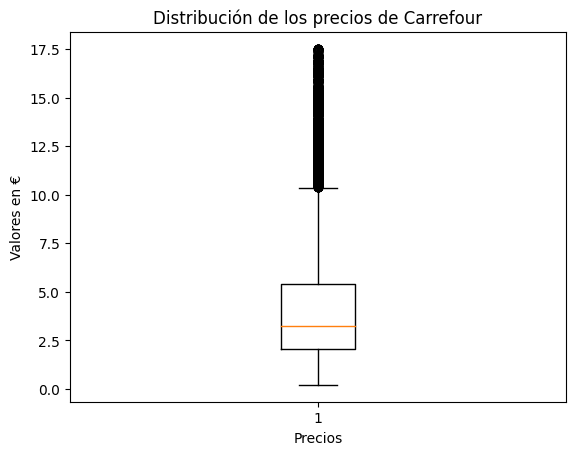

In [170]:
plt.boxplot(df_cf_precios_bajos["Precios"])
plt.xlabel("Precios")
plt.ylabel("Valores en €")
plt.title("Distribución de los precios de Carrefour")
plt.show()

In [171]:
df__cf_precios_altos = df__cf_precios_altos.sort_values("Precios", ascending=False)
df__cf_precios_altos

,nombre,Precios,Precios_unit,categorias,subcategoria,Categoria_principal,Unidad de referencia
993,Jamón de Bellota Ibérico 100% Raza Ibérica Sán...,439.00,67.540,productos frescos,charcuteria,Charcutería y quesos,KILO
1014,Jamón de bellota ibérico curado 100% raza ibér...,399.00,57.000,productos frescos,charcuteria,Charcutería y quesos,KILO
1037,Jamón de Bellota Ibérico 50% Raza Ibérica Iber...,265.00,35.330,productos frescos,charcuteria,Charcutería y quesos,KILO
1013,Jamón de Bellota Ibérico 50% Raza Ibérica Nobl...,249.00,35.570,productos frescos,charcuteria,Charcutería y quesos,KILO
1042,Paleta de Bellota Ibérica 100% Raza Ibérica Ci...,249.00,52.420,productos frescos,charcuteria,Charcutería y quesos,KILO
...,...,...,...,...,...,...,...
13495,Champú de cebolla Nuggela&Sulé 250 ml.,17.59,7.041,parafarmacia,cabello,Cuidado facial y corporal,100 ML
11194,Spray protector solar protección invisible SPF...,17.59,8.791,perfumeria e higiene,cuidado y proteccion corporal,Cuidado facial y corporal,100 ML
8688,Viña Mayor Vendimia Seleccionada Tinto 2018,17.59,17.590,bebidas,vinos,Bodega,UNIDAD
11172,Spray protector solar FP50 Protege & Refresca ...,17.59,8.791,perfumeria e higiene,cuidado y proteccion corporal,Cuidado facial y corporal,100 ML


In [172]:
df__cf_precios_altos.shape

(732, 7)

In [173]:
df__cf_precios_altos.describe().round(2)

,Precios,Precios_unit
count,732.00,732.00
mean,32.38,31.24
std,31.41,44.86
min,17.55,0.00
25%,20.80,3.61
50%,24.40,21.60
75%,33.70,40.53
max,439.00,467.44


<Axes: >

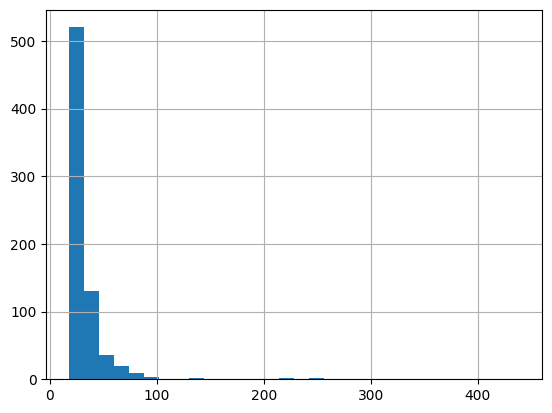

In [174]:
df__cf_precios_altos["Precios"].hist(bins=30)

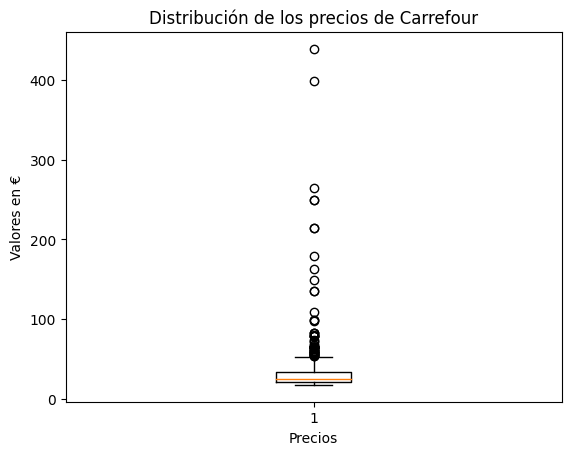

In [175]:
plt.boxplot(df__cf_precios_altos["Precios"])
plt.xlabel("Precios")
plt.ylabel("Valores en €")
plt.title("Distribución de los precios de Carrefour")
plt.show()

In [176]:
df_cf_precios_bajos.to_csv(r"Carrefour_limpio_16-06-2024.csv",index=False)